<a href="https://colab.research.google.com/github/tonytung3721/Nguyen-Thanh-Tung/blob/main/Sentiment_Analysis_using_Naive_Bayes_and_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **1. IMPORT LIBRARIES AND DATASETS**







In [ ]:
pip install jupyterthemes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:
df = pd.read_csv("amazon.csv", engine='python')
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"""Sometimes while playing a game, you can answe...",1
3,"""I have had a lot of fun with this thing. My 4...",1
4,Music,1


### **2. EXPLORE DATASET**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3150 non-null   object
 1   feedback          3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


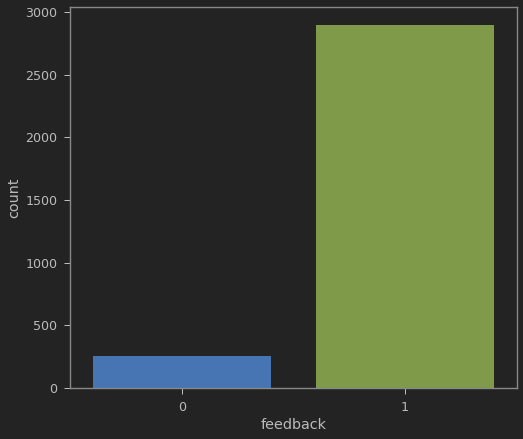

In [6]:
 sns.countplot(df['feedback'], label = "Count") 

In [7]:
df['length'] = df['verified_reviews'].apply(len)

In [8]:
df.describe()

,feedback,length
count,3150.000000,3150.000000
mean,0.918413,132.686984
std,0.273778,182.526555
min,0.000000,1.000000
25%,1.000000,30.000000
50%,1.000000,74.000000
75%,1.000000,166.000000
max,1.000000,2853.000000


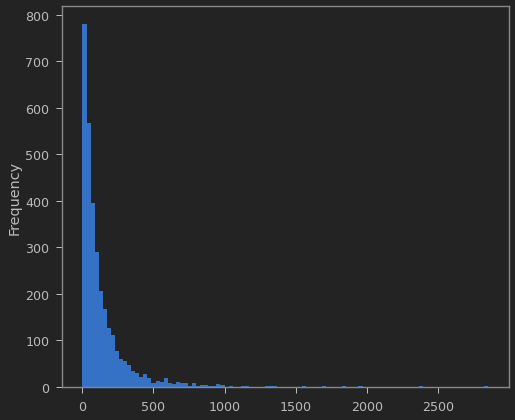

In [9]:
df['length'].plot(bins=100, kind='hist') 

### **3. PLOT THE WORDCLOUD**

In [11]:
string = df['verified_reviews'].tolist()
one_string = ' '.join(string)

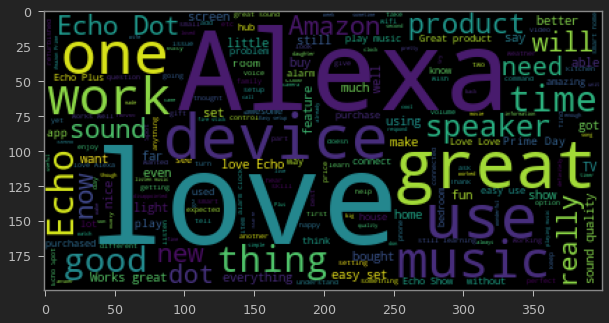

In [14]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(one_string))

### **4. PERFORM DATA CLEANING**



*   Remove punctation
*   Remove Stopword
*   Lemmatization





In [13]:
import string
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords


In [16]:
import spacy

In [17]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [18]:
def cleaning(message):
  punc_removed = [char for char in message if char not in string.punctuation] #remove punctuation
  punc_removed_join = ''.join(punc_removed)
  punc_stopword = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')] #remove stopword
  doc = nlp(' '.join(punc_stopword)) #lemmatization
  return [token.lemma_ for token in doc]

In [19]:
message = 'She goes apples'
cleaning(message)

['go', 'apple']

In [21]:
# Let's test the newly added function
df_clean = df['verified_reviews'].apply(cleaning)

### **5. PERFORM COUNT VECTORIZATION (TOKENIZATION)**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
countvectorizer = CountVectorizer(analyzer = cleaning, dtype = 'uint8').fit_transform(df['verified_reviews']).toarray()
# tweets_countvectorizer = vectorizer

In [24]:
X = countvectorizer

In [25]:
y = df['feedback']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

### **6. TRAIN A NAIVE BAYES CLASSIFIER MODEL**

In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

### **7. ASSESS TRAINED MODEL PERFORMANCE USING NAIVE BAYES**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix


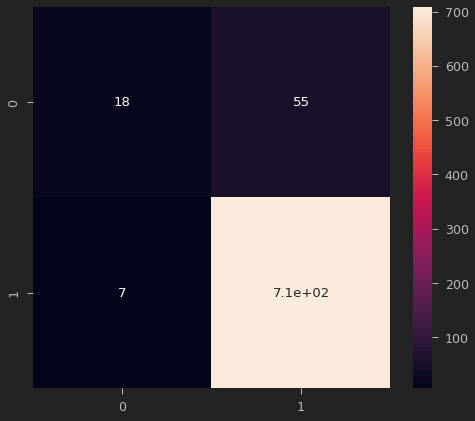

In [29]:
# Predicting the Test set results
y_predict_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [30]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.72      0.25      0.37        73
           1       0.93      0.99      0.96       715

    accuracy                           0.92       788
   macro avg       0.82      0.62      0.66       788
weighted avg       0.91      0.92      0.90       788



### **8. TRAIN A LINEAR REGRESSION CLASSIFIER MODEL**

In [31]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train, y_train)

LogisticRegression()

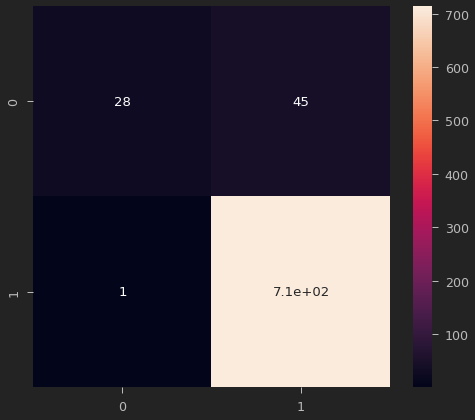

In [32]:
# Predicting the Test set results
y_predict_test = LG.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [33]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.38      0.55        73
           1       0.94      1.00      0.97       715

    accuracy                           0.94       788
   macro avg       0.95      0.69      0.76       788
weighted avg       0.94      0.94      0.93       788

